## Training models

In [ ]:
# Baseline (5 эпохи)
!python /src/train.py --model baseline --epochs 5

# # BiGRU-head (5 эпох)
!python /src/train.py --model bigru   --epochs 5

# # CNN-head (5 эпох)
!python /src/train.py --model cnn     --epochs 5

# Hybrid (5 эпох)
! python /src/train_hybrid.py --epochs 5 --batch_size 16 --lr 2e-5 --device auto



/usr/local/lib/python3.10/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
2025-05-14 01:07:36,883 INFO: Using device: cuda
2025-05-14 01:07:37,205 INFO: Computing hand-crafted features …
2025-05-14 01:12:01,136 INFO: Creating sentiment pipeline on device None …
2025-05-14 01:12:01,709 INFO: Computing sentiment …
2025-05-14 01:12:57,473 INFO: Computing named-entity counts …
2025-05-14 01:16:12,372 INFO: Hybrid features added and CSVs updated.
2025-05-14 01:16:13,403 INFO: Model 'hybrid' params: 66,364,446
2025-05-14 01:16:13,404 INFO: HybridModel parameters: 66,364,446
2025-05-14 01:18:01,907 INFO: Epoch 1/5  train loss: 0.0571
2025-05-14 01:18:07,933 INFO: Val acc=0.8113, fake-F1=0.6497
2025-05-14 01:18:08,576 INFO: Saved new best hybrid model → hybrid1_best.pt
2025-05-14 01:20:02,079 INFO: Epoch 2/5  train loss: 0.0437
2025-05-14 01:20:08,515 INFO: Val acc=

## Определение важности токенов на примере

In [3]:
# в интерактивном cell Colab, или в отдельном скрипте:
from transformers import AutoTokenizer
import torch
import sys
sys.path.append("/content/drive/MyDrive/FakeNewNet")

from src.viz import get_token_importance
from src.models import get_model
from src.config import PRETRAINED_MODEL_NAME

device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

model = get_model("hybrid").to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/FakeNewNet/src/outputs/hybrid_best.pt"))
tokens_imp = get_token_importance(model, tokenizer, "This is a sample news article to explain.", device=device)
print(tokens_imp)


[('this', 0.016343802213668823), ('is', 0.011878392659127712), ('a', 0.008677235804498196), ('sample', -0.04982737451791763), ('news', -0.0007279198616743088), ('article', 0.09877806901931763), ('to', -0.06826497614383698), ('explain', -0.0393950417637825), ('.', 0.02972937934100628)]


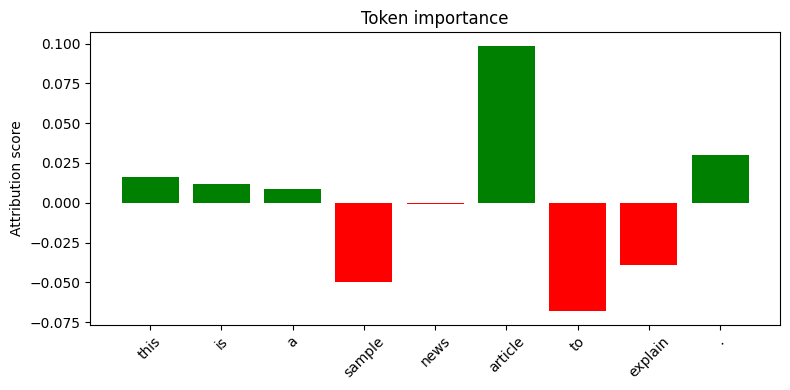

In [4]:
import matplotlib.pyplot as plt

tokens, scores = zip(*tokens_imp)
plt.figure(figsize=(8,4))
plt.bar(range(len(tokens)), scores, color=['red' if s<0 else 'green' for s in scores])
plt.xticks(range(len(tokens)), tokens, rotation=45)
plt.ylabel("Attribution score")
plt.title("Token importance")
plt.tight_layout()
plt.show()


## Saving metrics/Perfomance of models

In [ ]:
!python /src/run_ablation.py

In [ ]:
!python /src/benchmark.py

📊 Benchmark …
baseline cpu: 262.67 ms/article
baseline cuda: 5.89 ms/article
bigru    cpu: 262.36 ms/article
bigru    cuda: 6.69 ms/article
/usr/local/lib/python3.10/site-packages/torch/nn/modules/conv.py:370: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /pytorch/aten/src/ATen/native/Convolution.cpp:1036.)
  return F.conv1d(
cnn      cpu: 248.41 ms/article
cnn      cuda: 6.56 ms/article
hybrid   cpu: 248.81 ms/article
hybrid   cuda: 6.46 ms/article
✅ benchmark.csv → /content/drive/MyDrive/FakeNewNet/src/outputs/benchmark.csv


In [ ]:
!python /src/evaluate.py \
       --model hybrid \
       --ckpt /src/outputs/hybrid_best.pt \
       --save_pr


!python /src/evaluate.py \
       --model baseline \
       --ckpt /src/outputs/baseline_best.pt \
       --save_pr


!python /src/evaluate.py \
       --model bigru \
       --ckpt /src/outputs/bigru_best.pt \
       --save_pr


!python /src/evaluate.py \
       --model cnn \
       --ckpt /src/outputs/cnn_best.pt \
       --save_pr


{"accuracy": 0.8535, "macro_F1": 0.8162, "precision_real": 0.9311, "recall_real": 0.8692, "f1_real": 0.8991, "precision_fake": 0.6722, "recall_fake": 0.8066, "f1_fake": 0.7333, "roc_auc": 0.9118, "pr_auc": 0.823}
saved /content/drive/MyDrive/FakeNewNet/src/outputs/hybrid/cm_hybrid.png
saved /content/drive/MyDrive/FakeNewNet/src/outputs/hybrid/pr_hybrid.png
{"accuracy": 0.8338, "macro_F1": 0.7799, "precision_real": 0.8924, "recall_real": 0.8852, "f1_real": 0.8888, "precision_fake": 0.6631, "recall_fake": 0.6791, "f1_fake": 0.671, "roc_auc": 0.8661, "pr_auc": 0.7581}
saved /content/drive/MyDrive/FakeNewNet/src/outputs/baseline/cm_baseline.png
saved /content/drive/MyDrive/FakeNewNet/src/outputs/baseline/pr_baseline.png
{"accuracy": 0.8223, "macro_F1": 0.7719, "precision_real": 0.8979, "recall_real": 0.8611, "f1_real": 0.8791, "precision_fake": 0.6282, "recall_fake": 0.7055, "f1_fake": 0.6646, "roc_auc": 0.8646, "pr_auc": 0.7552}
saved /content/drive/MyDrive/FakeNewNet/src/outputs/bigru/cm

### Getting results of a random news article

In [ ]:
!python /src/explain_sample.py --ckpt /src/outputs/hybrid_best.pt --text /src/text.txt

Result: real 

✅ fake-wordcloud saved → /content/drive/MyDrive/FakeNewNet/src/outputs/cloud.png
✅ HTML highlight saved → /content/drive/MyDrive/FakeNewNet/src/outputs/explain.html
✅  Outputs saved to /content/drive/MyDrive/FakeNewNet/src/outputs
    cloud.png
    explain.html
